In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
from datetime import datetime as dt
from datetime import timedelta as td
#import qiskit
#from qiskit.tools.visualization import plot_histogram


ModuleNotFoundError: No module named 'qiskit'

In [2]:
buggy_elements = pd.read_csv('../data/RQ2_Data.csv')

In [3]:
buggy_elements.head()

,Authors,Bug ID,Bug Type,Commits,Components,Dates,File,Hash,Line,Repo,Lifetime,Number of Authors,Number of times modified
0,"['gadial ', 'cjwood ']",1.0,Classical,"['ec1b4ce759f1fb8ba0242dd6c4a309fa1b586666', '...",#Function Call#Attribute,"['1544613090', '1530290738']",qiskit_ignis/tomography/fitters/cvx_fit.py,ec1b4ce759f1fb8ba0242dd6c4a309fa1b586666,237.0,qiskit-ignis,"165 days, 19:25:52",2,2
1,"['nkanazawa ', 'David McKay ']",10.0,Quantum,"['e696fee3e52550f50fb240a4c6356c61c9f01725', '...",#Function Call#Assignment#Binary Operator#Lis...,"['1573627102', '1573332608']",qiskit/ignis/characterization/calibrations/ibm...,e696fee3e52550f50fb240a4c6356c61c9f01725,143.0,qiskit-ignis,"3 days, 9:48:14",2,2
2,"['nkanazawa ', 'David McKay ']",10.0,Quantum,"['e696fee3e52550f50fb240a4c6356c61c9f01725', '...",#Function Call#Assignment#Binary Operator#Una...,"['1573627102', '1573332608']",qiskit/ignis/characterization/calibrations/ibm...,e696fee3e52550f50fb240a4c6356c61c9f01725,145.0,qiskit-ignis,"3 days, 9:48:14",2,2
3,"['Christopher J. Wood ', 'Christopher J. Wood ']",1012.0,Classical,"['7de864cc989b354d0ad1febbd62b891270927b6b', '...",#Function Call#Attribute,"['1587413459', '1586378911']",test/terra/reference/ref_diagonal_gate.py,7de864cc989b354d0ad1febbd62b891270927b6b,37.0,qiskit-aer,"11 days, 23:22:28",1,2
4,"['Christopher J. Wood ', 'Christopher J. Wood ']",1012.0,Classical,"['7de864cc989b354d0ad1febbd62b891270927b6b', '...",#Function Call#Unary Operator#Constant#List#A...,"['1587413459', '1586378911']",test/terra/reference/ref_diagonal_gate.py,7de864cc989b354d0ad1febbd62b891270927b6b,38.0,qiskit-aer,"11 days, 23:22:28",1,2


In [4]:
buggy_elements.shape

(9327, 13)

## Convert to timedelta

In [5]:
buggy_elements['Lifetime']= pd.to_timedelta(buggy_elements['Lifetime'])

In [6]:
buggy_elements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9327 entries, 0 to 9326
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Authors                   9327 non-null   object         
 1   Bug ID                    9327 non-null   float64        
 2   Bug Type                  9327 non-null   object         
 3   Commits                   9327 non-null   object         
 4   Components                9327 non-null   object         
 5   Dates                     9327 non-null   object         
 6   File                      9327 non-null   object         
 7   Hash                      9327 non-null   object         
 8   Line                      9327 non-null   float64        
 9   Repo                      9327 non-null   object         
 10  Lifetime                  9327 non-null   timedelta64[ns]
 11  Number of Authors         9327 non-null   int64          
 12  Number

In [7]:
buggy_elements['Lifetime'] = buggy_elements['Lifetime'].dt.total_seconds()

for i in buggy_elements['Lifetime']:
    
    print(i)

## Average Bug lifetime, Nº of times modified and Number of Authors for each type of component- Overall Distribution

In [8]:
code_element_component = ['Return','Function Call','Del keyword','Assignment','Augmented Assignment','Annotated assignment','For loop','Async For Loop','While loop','If statement','With keyword','Async With keyword','Match keyword','Raise exception','Try exception','Assertion','Import keyword','ImportFrom keyword','Global Variable','Non Local Variable','Break','Continue','Pass','Boolean operator','Named expression','Binary operator','Unitary Operator','Lambda','Conditional expression','List comprehension','Set comprehension','Dictionary comprehension','Object generator','Await expression','Yield expression','YieldFrom expression','Comparison expression','Constant','Tuple','List','Attribute']

In [9]:
component_author_average = []
component_modified_average = []
component_lifetime_average = []


for component in code_element_component:
    
    rslt_df = buggy_elements[buggy_elements['Components'].str.contains(component, regex=False)]
    
    
    component_author_average.append(rslt_df["Number of Authors"].mean())
    component_modified_average.append(rslt_df["Number of times modified"].mean())
    component_lifetime_average.append(rslt_df["Lifetime"].mean())

    

In [10]:
component_author_average = [0 if math.isnan(x) else x for x in component_author_average]

In [11]:
component_modified_average = [0 if math.isnan(x) else x for x in component_modified_average]

In [12]:
component_lifetime_average = [0 if math.isnan(x) else x for x in component_lifetime_average]

In [13]:
print(component_author_average)

[1.8785714285714286, 1.4935897435897436, 0, 1.5971143174250833, 1.6666666666666667, 0, 2.888888888888889, 0, 0, 2.0, 0, 0, 0, 1.0, 2.0, 2.1818181818181817, 1.48202396804261, 1.481012658227848, 0, 0, 0, 0, 1.5121951219512195, 0, 0, 0, 0, 1.0, 0, 1.75, 0, 0, 1.0, 0, 0, 0, 1.6842105263157894, 1.5727802037845706, 2.0, 1.5616438356164384, 1.5094562647754137]


In [14]:
print(component_modified_average)

[2.4285714285714284, 2.009157509157509, 0, 2.1453940066592674, 2.0, 0, 2.888888888888889, 0, 0, 2.7714285714285714, 0, 0, 0, 1.0, 3.0, 2.1818181818181817, 1.7336884154460719, 1.6075949367088607, 0, 0, 0, 0, 1.5121951219512195, 0, 0, 0, 0, 1.0, 0, 3.173076923076923, 0, 0, 1.0, 0, 0, 0, 2.1210526315789475, 2.018922852983988, 3.9473684210526314, 2.671232876712329, 2.0721040189125297]


In [15]:
print(component_lifetime_average)

[95083456.75, 59966374.9459707, 0, 68949888.47613762, 18649548.666666668, 0, 9314204.0, 0, 0, 81296288.75238095, 0, 0, 0, 30390186.333333332, 106634733.0, 11155773.0, 85267853.10386151, 78176151.62531646, 0, 0, 0, 0, 77062214.82926829, 0, 0, 0, 0, 45388056.0, 0, 34166804.98076923, 0, 0, 7440523.0, 0, 0, 0, 63763445.12631579, 68565065.58078602, 44450558.0, 25683694.75342466, 53567659.079196215]


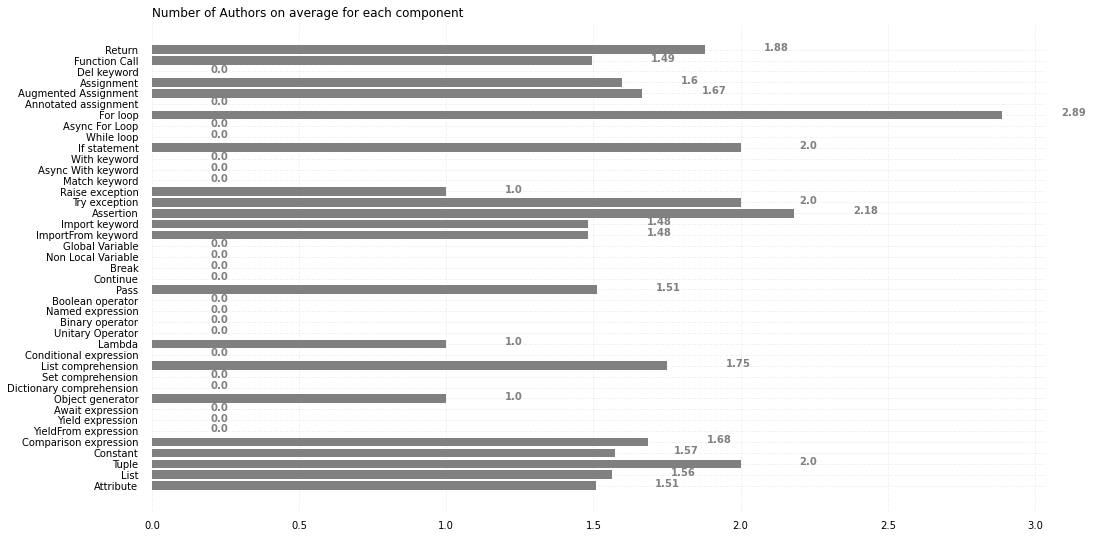

In [19]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(code_element_component, component_author_average, color = 'grey')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of Authors on average for each component ',
             loc ='left', )
# Show Plot
plt.show()

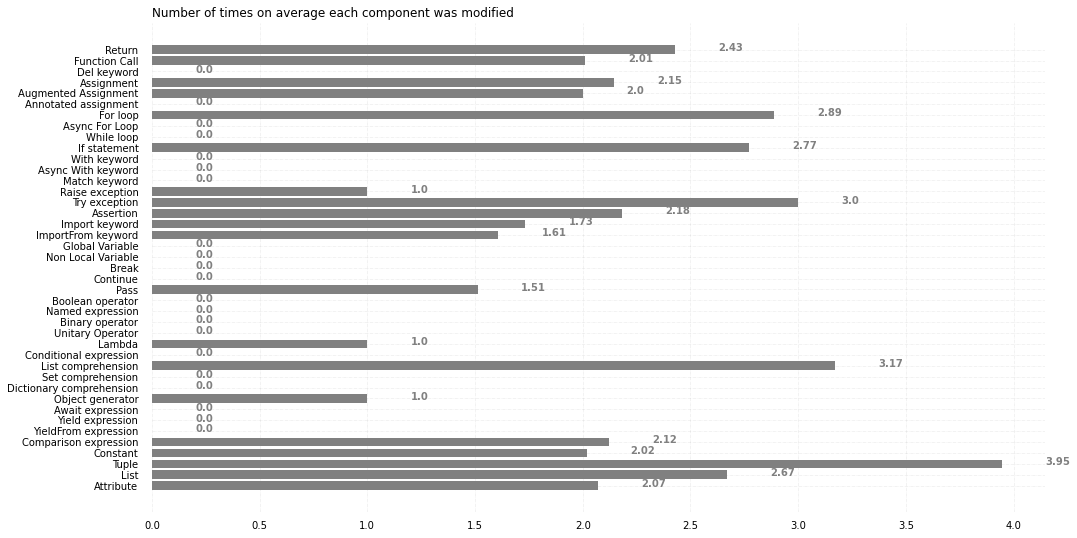

In [20]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(code_element_component, component_modified_average, color = 'grey')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of times on average each component was modified ',
             loc ='left', )
# Show Plot
plt.show()

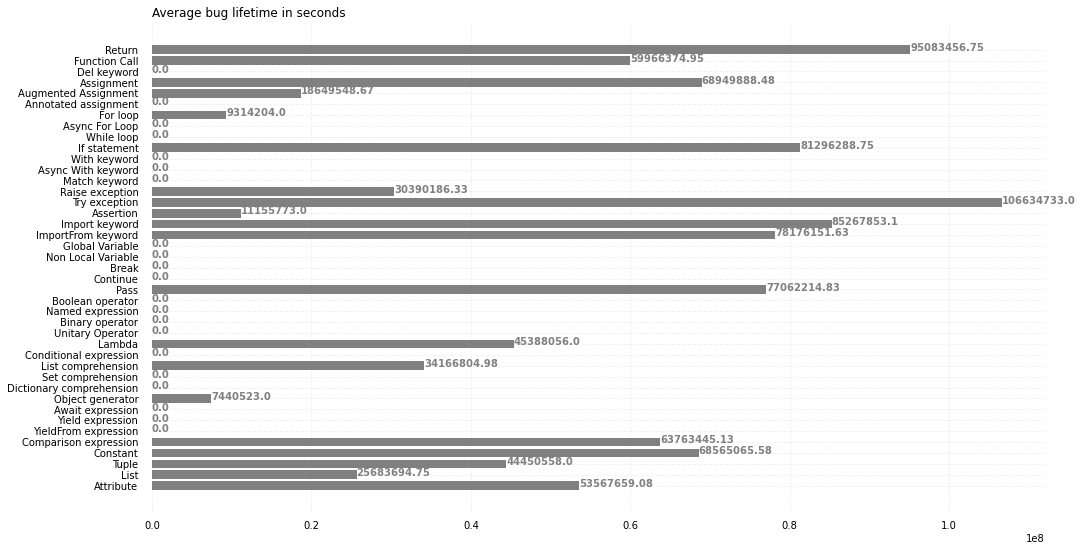

In [21]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(code_element_component, component_lifetime_average, color = 'grey')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Average bug lifetime in seconds',
             loc ='left', )
# Show Plot
plt.show()

plot_histogram([result1.get_counts(), result1.get_counts(),result3.get_counts()], sort='desc', figsize=(15,12),
               color=['orange', 'red', 'blue'])


## Quantum Distribution

In [22]:
quantum_bug_dataframe = buggy_elements.loc[((buggy_elements['Bug Type'] == 'Quantum'))]

In [23]:
quantum_bug_dataframe.head()

,Authors,Bug ID,Bug Type,Commits,Components,Dates,File,Hash,Line,Repo,Lifetime,Number of Authors,Number of times modified
1,"['nkanazawa ', 'David McKay ']",10.0,Quantum,"['e696fee3e52550f50fb240a4c6356c61c9f01725', '...",#Function Call#Assignment#Binary Operator#Lis...,"['1573627102', '1573332608']",qiskit/ignis/characterization/calibrations/ibm...,e696fee3e52550f50fb240a4c6356c61c9f01725,143.0,qiskit-ignis,294494.0,2,2
2,"['nkanazawa ', 'David McKay ']",10.0,Quantum,"['e696fee3e52550f50fb240a4c6356c61c9f01725', '...",#Function Call#Assignment#Binary Operator#Una...,"['1573627102', '1573332608']",qiskit/ignis/characterization/calibrations/ibm...,e696fee3e52550f50fb240a4c6356c61c9f01725,145.0,qiskit-ignis,294494.0,2,2
75,"['Shumpei Kobayashi ', 'Josh Izaac ', 'antalsz...",107.0,Quantum,"['474f337b176f706a180ac62d6c7840c01f604192', '...",#Function Call#Assignment#Attribute,"['1605554911', '1590667700', '1575667267', '15...",pennylane/interfaces/torch.py,474f337b176f706a180ac62d6c7840c01f604192,215.0,pennylane,55973166.0,3,7
76,"['Shumpei Kobayashi ', 'Josh Izaac ', 'antalsz...",107.0,Quantum,"['474f337b176f706a180ac62d6c7840c01f604192', '...",#Function Call#Assignment#Attribute,"['1605554911', '1590667700', '1575667267', '15...",pennylane/interfaces/torch.py,474f337b176f706a180ac62d6c7840c01f604192,215.0,pennylane,55973166.0,3,7
77,"['Shumpei Kobayashi ', 'Tom Bromley ']",107.0,Quantum,"['474f337b176f706a180ac62d6c7840c01f604192', '...",#Assignment#Attribute,"['1605554911', '1589894004']",pennylane/qnn/torch.py,474f337b176f706a180ac62d6c7840c01f604192,333.0,pennylane,15664507.0,2,2


In [24]:
quantum_bug_dataframe.shape

(9209, 13)

In [26]:
quantum_component_author_average = []
quantum_component_modified_average = []
quantum_component_lifetime_average = []

for component in code_element_component:
    
    quantum_rslt_df = quantum_bug_dataframe[quantum_bug_dataframe['Components'].str.contains(component, regex=False)]
   
    
    quantum_component_author_average.append(quantum_rslt_df["Number of Authors"].mean())
    quantum_component_modified_average.append(quantum_rslt_df["Number of times modified"].mean())
    quantum_component_lifetime_average.append(quantum_rslt_df["Lifetime"].mean())

In [29]:
quantum_component_modified_average = [0 if math.isnan(x) else x for x in quantum_component_modified_average]

In [30]:
quantum_component_author_average = [0 if math.isnan(x) else x for x in quantum_component_author_average]

In [31]:
quantum_component_lifetime_average = [0 if math.isnan(x) else x for x in quantum_component_lifetime_average]

In [32]:
print(quantum_component_author_average)

[2.4285714285714284, 2.009157509157509, 0, 2.1453940066592674, 2.0, 0, 2.888888888888889, 0, 0, 2.7714285714285714, 0, 0, 0, 1.0, 3.0, 2.1818181818181817, 1.7336884154460719, 1.6075949367088607, 0, 0, 0, 0, 1.5121951219512195, 0, 0, 0, 0, 1.0, 0, 3.173076923076923, 0, 0, 1.0, 0, 0, 0, 2.1210526315789475, 2.018922852983988, 3.9473684210526314, 2.671232876712329, 2.0721040189125297]


In [33]:
print(quantum_component_modified_average)

[2.4285714285714284, 2.009157509157509, 0, 2.1453940066592674, 2.0, 0, 2.888888888888889, 0, 0, 2.7714285714285714, 0, 0, 0, 1.0, 3.0, 2.1818181818181817, 1.7336884154460719, 1.6075949367088607, 0, 0, 0, 0, 1.5121951219512195, 0, 0, 0, 0, 1.0, 0, 3.173076923076923, 0, 0, 1.0, 0, 0, 0, 2.1210526315789475, 2.018922852983988, 3.9473684210526314, 2.671232876712329, 2.0721040189125297]


In [34]:
print(quantum_component_lifetime_average)

[98308124.95555556, 63486322.011684515, 0, 70917421.78057143, 18649548.666666668, 0, 9314204.0, 0, 0, 93010009.4945055, 0, 0, 0, 30390186.333333332, 106634733.0, 11951567.857142856, 85267853.10386151, 78458343.34180433, 0, 0, 0, 0, 77062214.82926829, 0, 0, 0, 0, 45388056.0, 0, 34166804.98076923, 0, 0, 7440523.0, 0, 0, 0, 69486841.42690058, 71264507.69318181, 45388056.0, 29500311.301587302, 57597042.006402045]


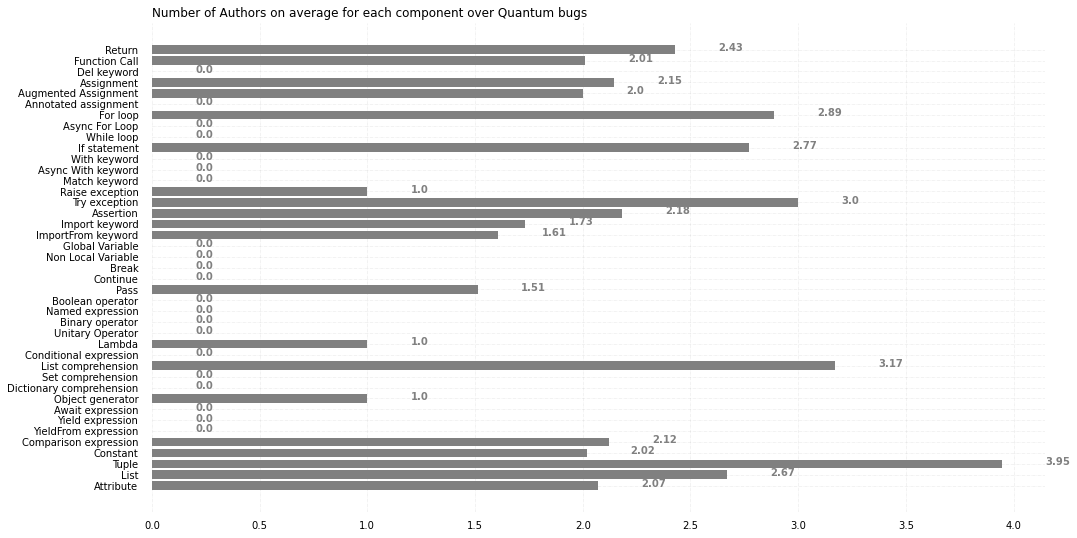

In [35]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(code_element_component, quantum_component_author_average, color = 'grey')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of Authors on average for each component over Quantum bugs ',
             loc ='left', )
# Show Plot
plt.show()

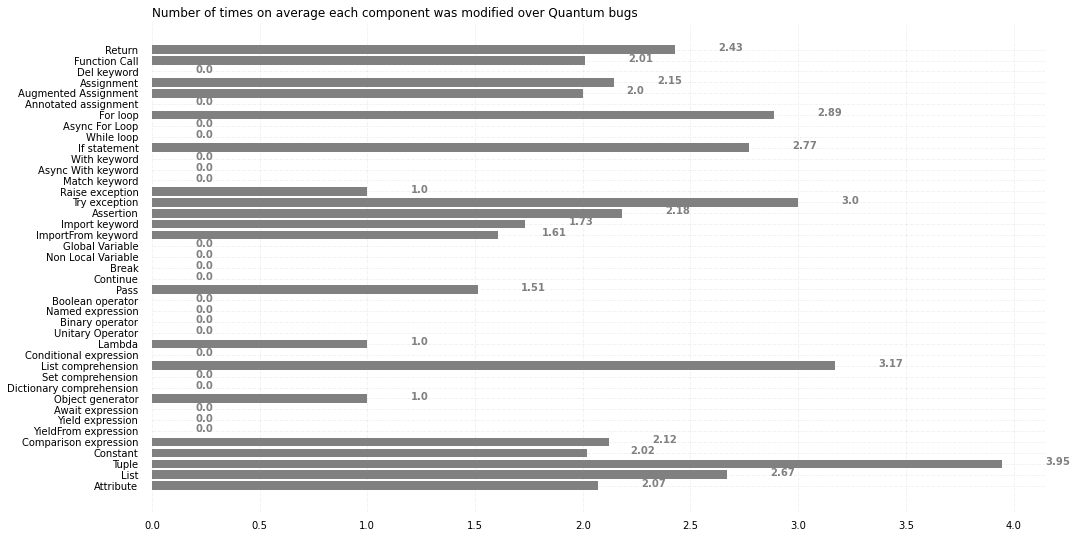

In [36]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(code_element_component, quantum_component_modified_average, color = 'grey')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of times on average each component was modified over Quantum bugs ',
             loc ='left', )
# Show Plot
plt.show()

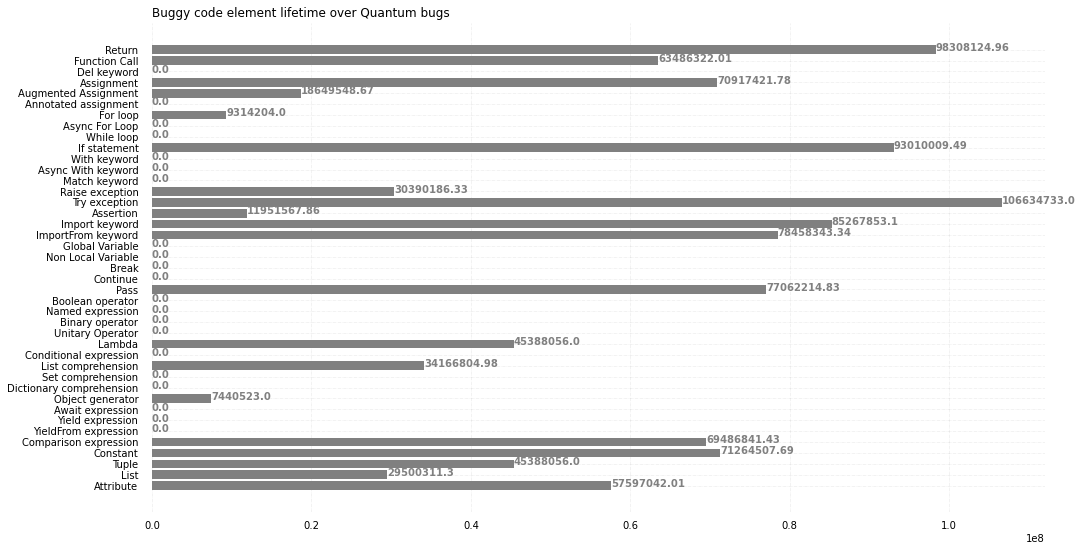

In [37]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(code_element_component, quantum_component_lifetime_average, color = 'grey')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Buggy code element lifetime over Quantum bugs',
             loc ='left', )
# Show Plot
plt.show()

## Classical Distribution

In [38]:
classical_bug_dataframe = buggy_elements.loc[((buggy_elements['Bug Type'] == 'Classical'))]

In [39]:
classical_bug_dataframe.head()

,Authors,Bug ID,Bug Type,Commits,Components,Dates,File,Hash,Line,Repo,Lifetime,Number of Authors,Number of times modified
0,"['gadial ', 'cjwood ']",1.0,Classical,"['ec1b4ce759f1fb8ba0242dd6c4a309fa1b586666', '...",#Function Call#Attribute,"['1544613090', '1530290738']",qiskit_ignis/tomography/fitters/cvx_fit.py,ec1b4ce759f1fb8ba0242dd6c4a309fa1b586666,237.0,qiskit-ignis,14325952.0,2,2
3,"['Christopher J. Wood ', 'Christopher J. Wood ']",1012.0,Classical,"['7de864cc989b354d0ad1febbd62b891270927b6b', '...",#Function Call#Attribute,"['1587413459', '1586378911']",test/terra/reference/ref_diagonal_gate.py,7de864cc989b354d0ad1febbd62b891270927b6b,37.0,qiskit-aer,1034548.0,1,2
4,"['Christopher J. Wood ', 'Christopher J. Wood ']",1012.0,Classical,"['7de864cc989b354d0ad1febbd62b891270927b6b', '...",#Function Call#Unary Operator#Constant#List#A...,"['1587413459', '1586378911']",test/terra/reference/ref_diagonal_gate.py,7de864cc989b354d0ad1febbd62b891270927b6b,38.0,qiskit-aer,1034548.0,1,2
5,"['Christopher J. Wood ', 'Christopher J. Wood ']",1012.0,Classical,"['7de864cc989b354d0ad1febbd62b891270927b6b', '...",#Function Call#Attribute,"['1587413459', '1586378911']",test/terra/reference/ref_diagonal_gate.py,7de864cc989b354d0ad1febbd62b891270927b6b,39.0,qiskit-aer,1034548.0,1,2
6,"['Christopher J. Wood ', 'Christopher J. Wood ']",1012.0,Classical,"['7de864cc989b354d0ad1febbd62b891270927b6b', '...",#If statement,"['1587413459', '1586378911']",test/terra/reference/ref_diagonal_gate.py,7de864cc989b354d0ad1febbd62b891270927b6b,40.0,qiskit-aer,1034548.0,1,2


In [40]:
classical_bug_dataframe.shape

(118, 13)

In [41]:
classical_component_author_average = []
classical_component_modified_average = []
classical_component_lifetime_average = []

for component in code_element_component:
    
    classical_rslt_df = classical_bug_dataframe[classical_bug_dataframe['Components'].str.contains(component, regex=False)]
   
    
    classical_component_author_average.append(classical_rslt_df["Number of Authors"].mean())
    classical_component_modified_average.append(classical_rslt_df["Number of times modified"].mean())
    classical_component_lifetime_average.append(classical_rslt_df["Lifetime"].mean())

In [42]:
classical_component_author_average = [0 if math.isnan(x) else x for x in classical_component_author_average]

In [43]:
classical_component_modified_average = [0 if math.isnan(x) else x for x in classical_component_modified_average]

In [44]:
classical_component_lifetime_average = [0 if math.isnan(x) else x for x in classical_component_lifetime_average]

In [45]:
print(classical_component_author_average)

[2.2, 1.476923076923077, 0, 2.0, 0, 0, 0, 0, 0, 1.8571428571428572, 0, 0, 0, 0, 0, 2.0, 0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.473684210526316, 1.6851851851851851, 2.0, 1.2, 1.5692307692307692]


In [46]:
print(classical_component_modified_average)

[2.4, 2.046153846153846, 0, 2.230769230769231, 0, 0, 0, 0, 0, 2.0714285714285716, 0, 0, 0, 0, 0, 2.0, 0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.736842105263158, 2.037037037037037, 2.0, 1.9, 2.0923076923076924]


In [47]:
print(classical_component_lifetime_average)

[8017415.2, 4351211.307692308, 0, 2734825.346153846, 0, 0, 0, 0, 0, 5157103.928571428, 0, 0, 0, 0, 0, 9763132.0, 0, 4147858.0000000005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12252878.421052631, 2578702.8333333335, 9763132.0, 1639010.5000000002, 5153073.446153847]


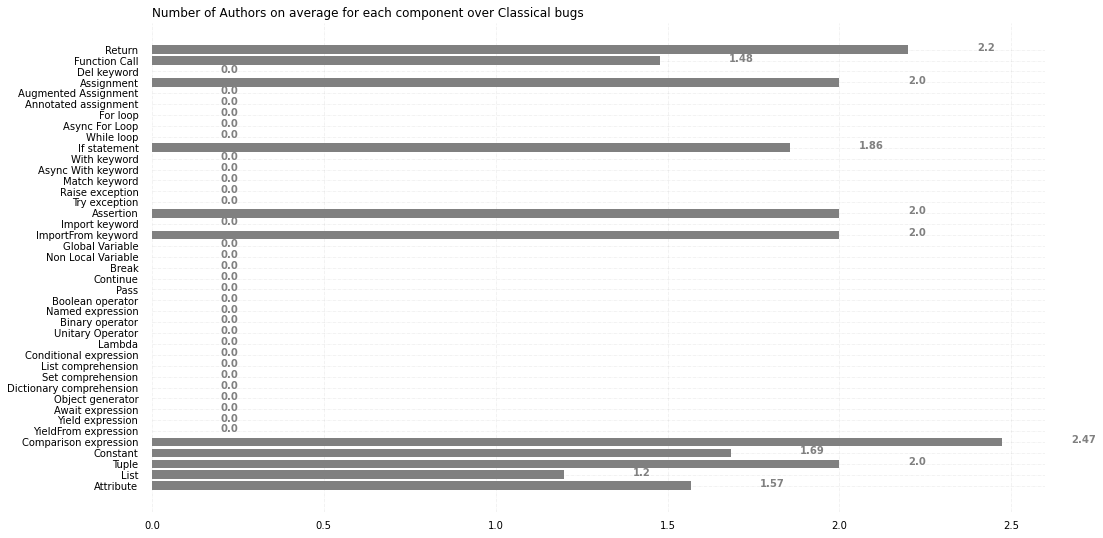

In [48]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(code_element_component, classical_component_author_average, color = 'grey')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of Authors on average for each component over Classical bugs ',
             loc ='left', )
# Show Plot
plt.show()

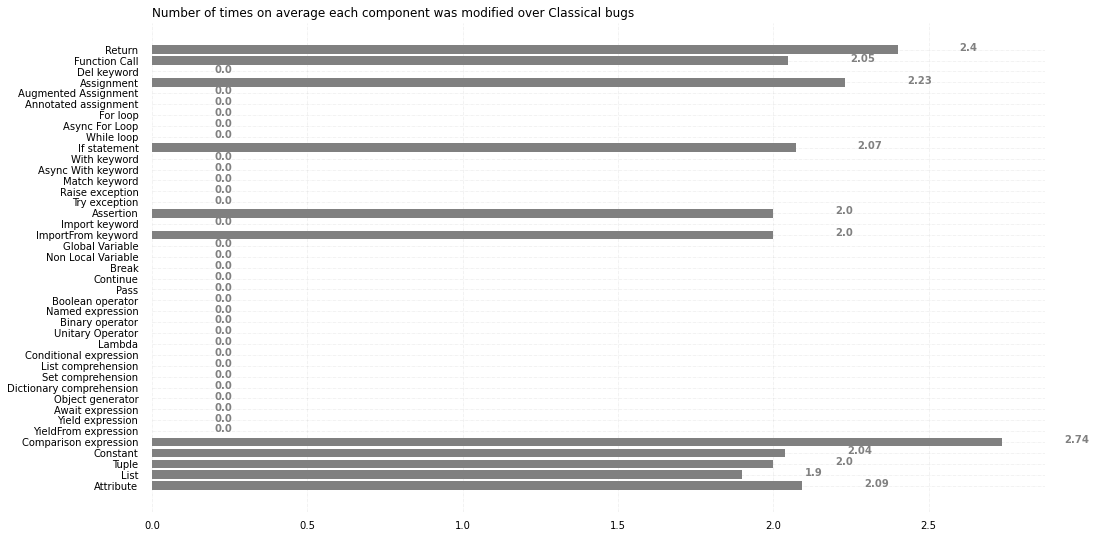

In [49]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(code_element_component, classical_component_modified_average, color = 'grey')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of times on average each component was modified over Classical bugs ',
             loc ='left', )
# Show Plot
plt.show()

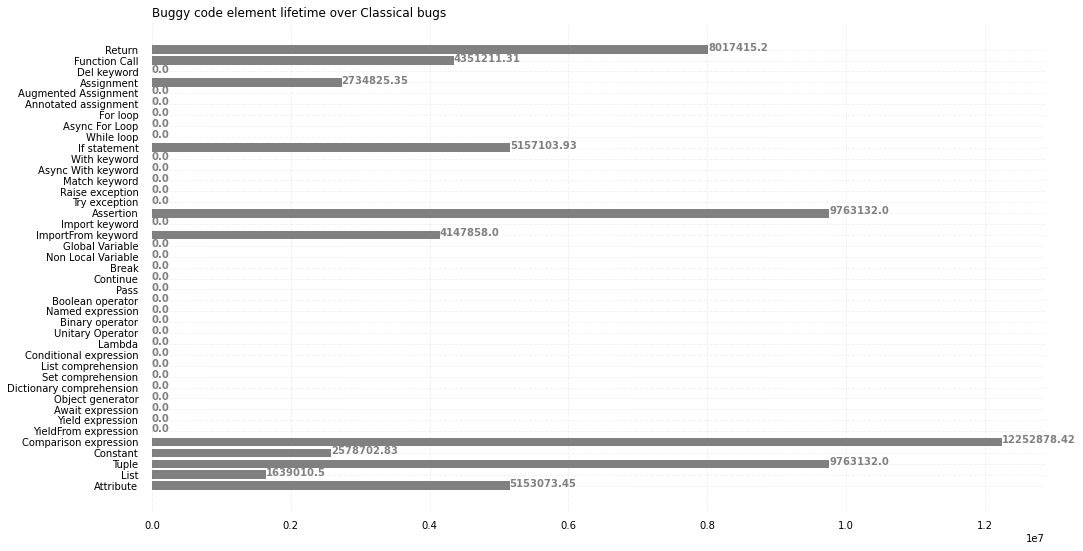

In [50]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(code_element_component, classical_component_lifetime_average, color = 'grey')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Buggy code element lifetime over Classical bugs ',
             loc ='left', )
# Show Plot
plt.show()

## Overall distribution per project

In [57]:
def buggy_code_element_project(project):
    project_bug_dataframe = buggy_elements.loc[((buggy_elements['Repo'] == project))]
                                                
    return project_bug_dataframe

In [58]:
def BugAuthorDistributionPerRepo(project_name,values):
        # Figure Size
    fig, ax = plt.subplots(figsize =(16, 9))

    # Horizontal Bar Plot
    ax.barh(code_element_component, values, color = 'gray')

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title
    #ax.set_title('Threshold distribution per project - ' + project_name,loc ='left', )
    # Show Plot
    plt.show()
    
    #fig.savefig("RQ1_" + project_name + "_Code_Element_Distribution.pdf", bbox_inches='tight',)
    

In [59]:
def BugModifiedDistributionPerRepo(project_name,values):
        # Figure Size
    fig, ax = plt.subplots(figsize =(16, 9))

    # Horizontal Bar Plot
    ax.barh(code_element_component, values, color = 'gray')

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title
    #ax.set_title('Threshold distribution per project - ' + project_name,loc ='left', )
    # Show Plot
    plt.show()
    
    #fig.savefig("RQ1_" + project_name + "_Code_Element_Distribution.pdf", bbox_inches='tight',)

In [60]:
def BugLifetimeDistributionPerRepo(project_name,values):
        # Figure Size
    fig, ax = plt.subplots(figsize =(16, 9))

    # Horizontal Bar Plot
    ax.barh(code_element_component, values, color = 'gray')

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title
    #ax.set_title('Threshold distribution per project - ' + project_name,loc ='left', )
    # Show Plot
    plt.show()
    
    #fig.savefig("RQ1_" + project_name + "_Code_Element_Distribution.pdf", bbox_inches='tight',)

In [61]:
uniqueRepo = buggy_elements['Repo'].unique()
print(uniqueRepo)

['qiskit-ignis' 'qiskit-aer' 'pennylane' 'ProjectQ']


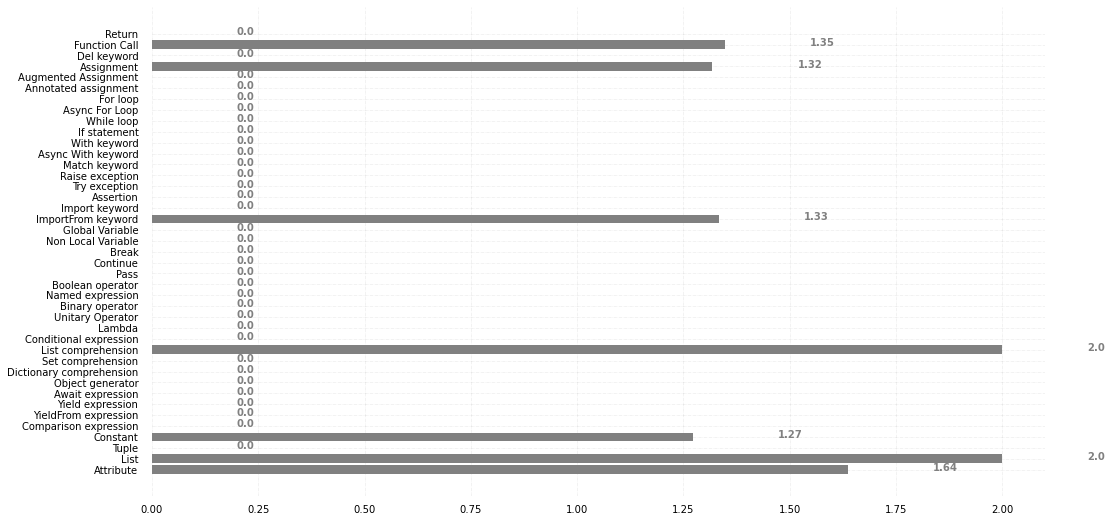

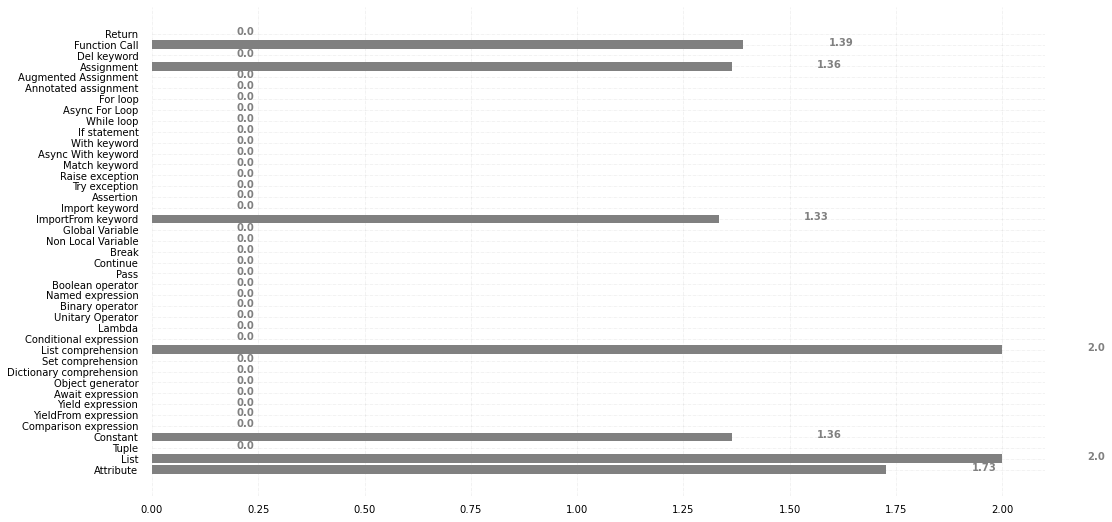

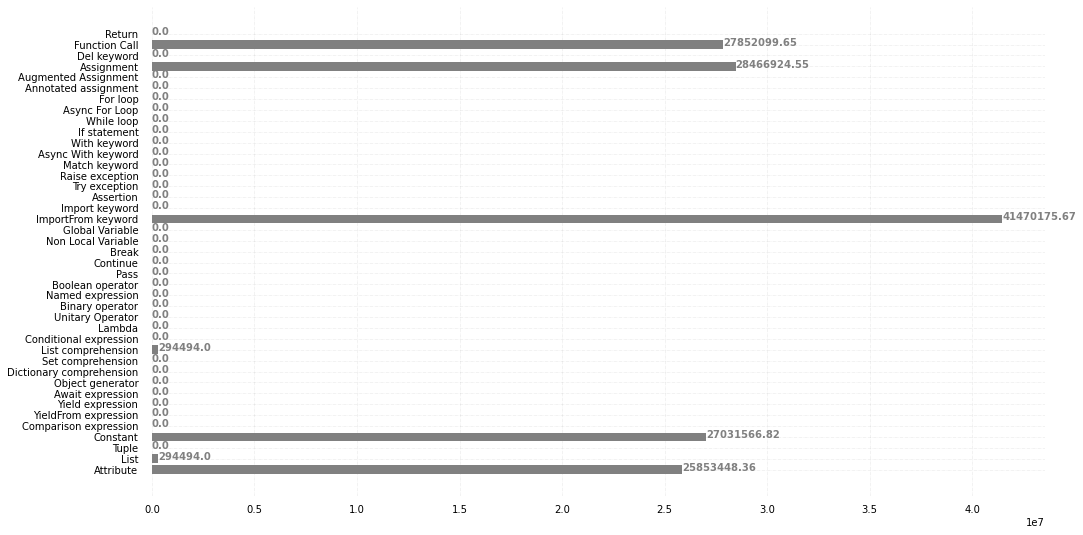

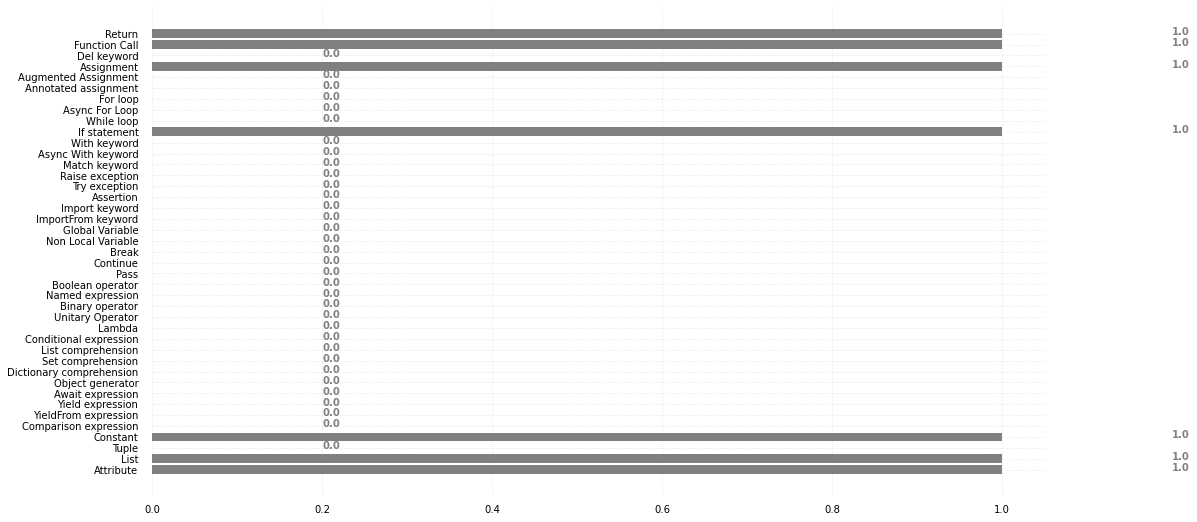

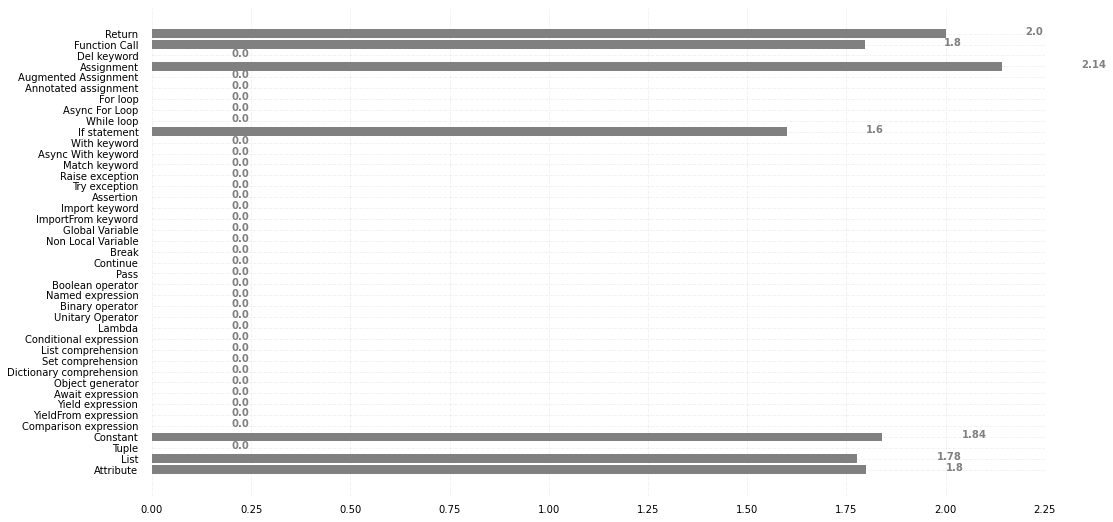

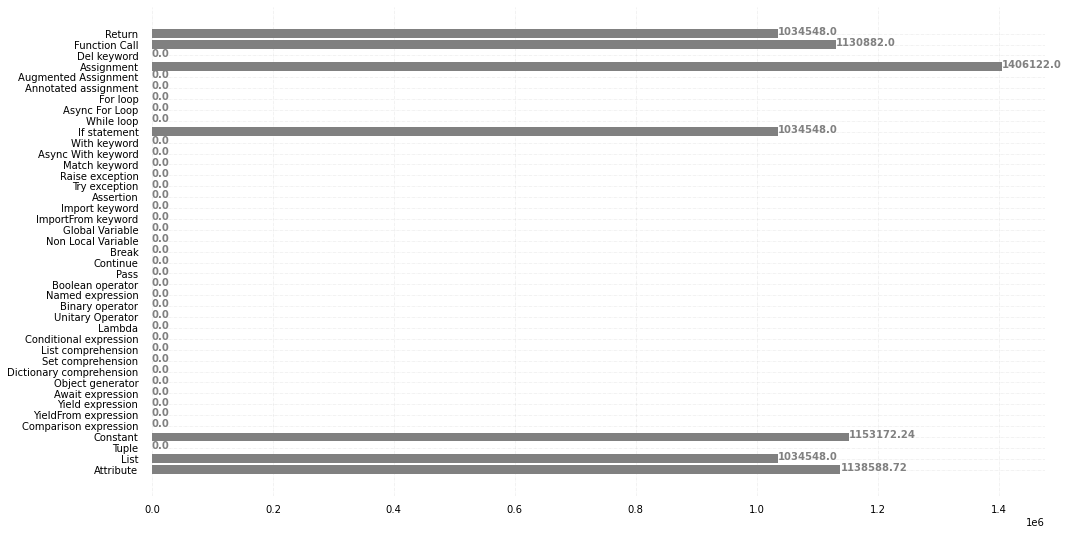

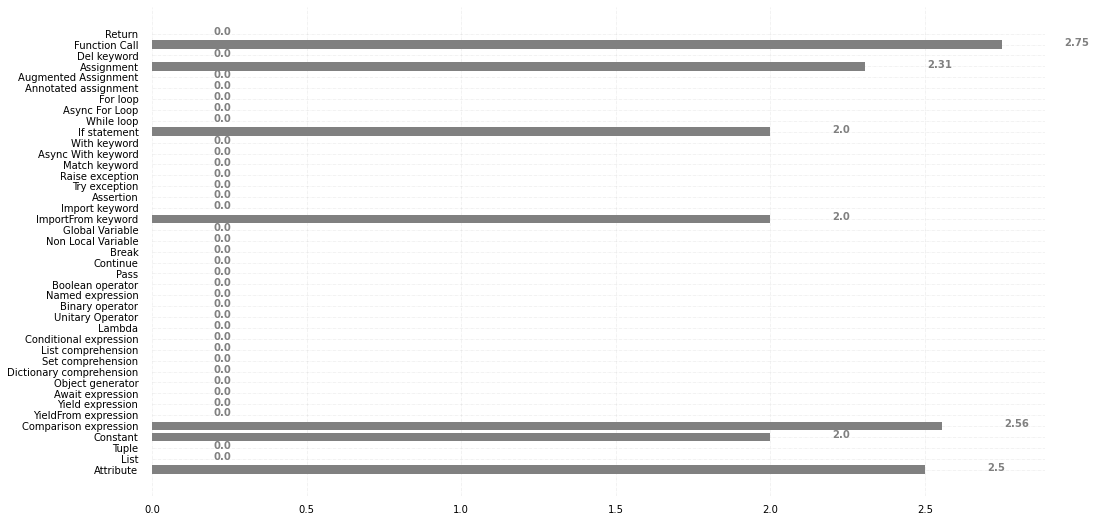

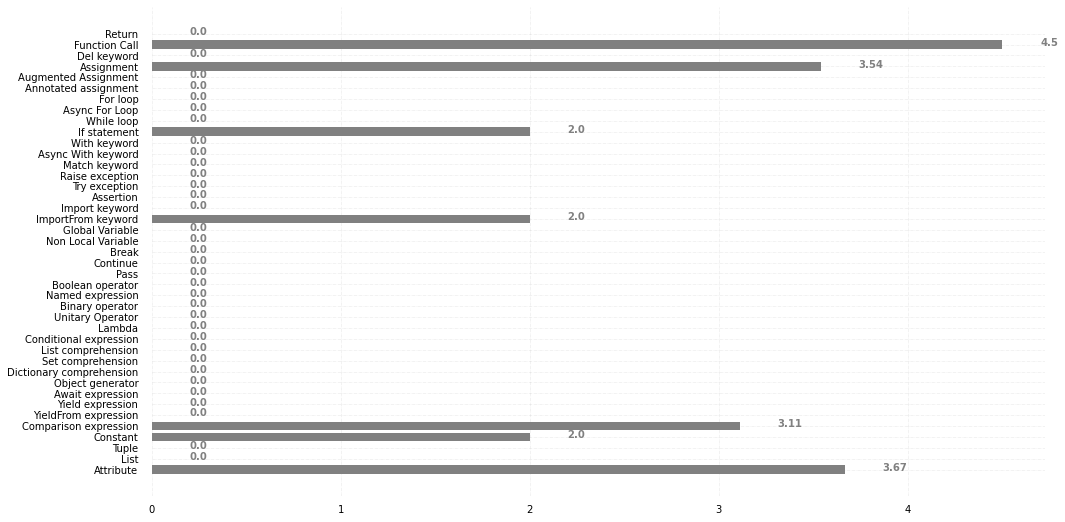

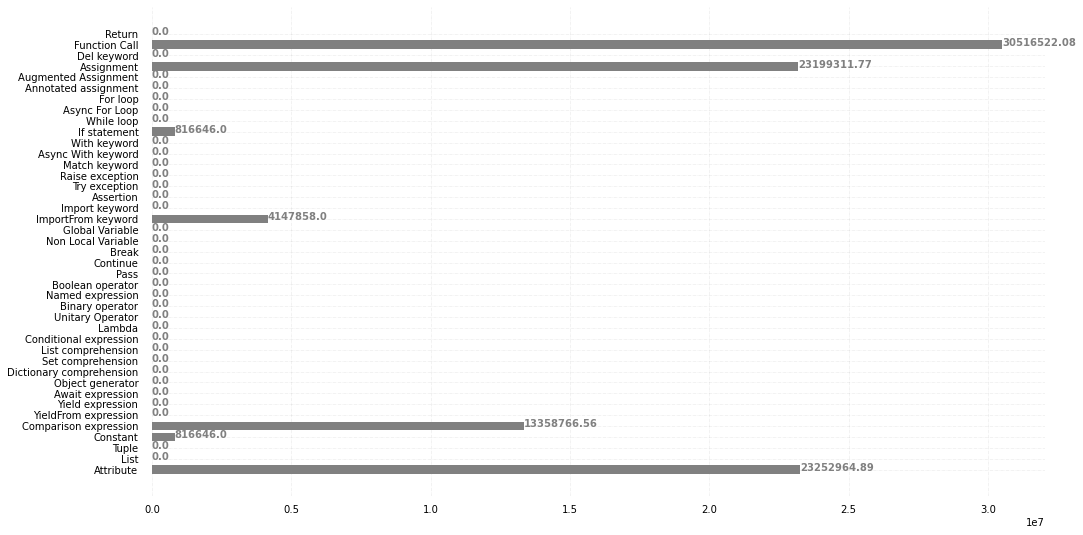

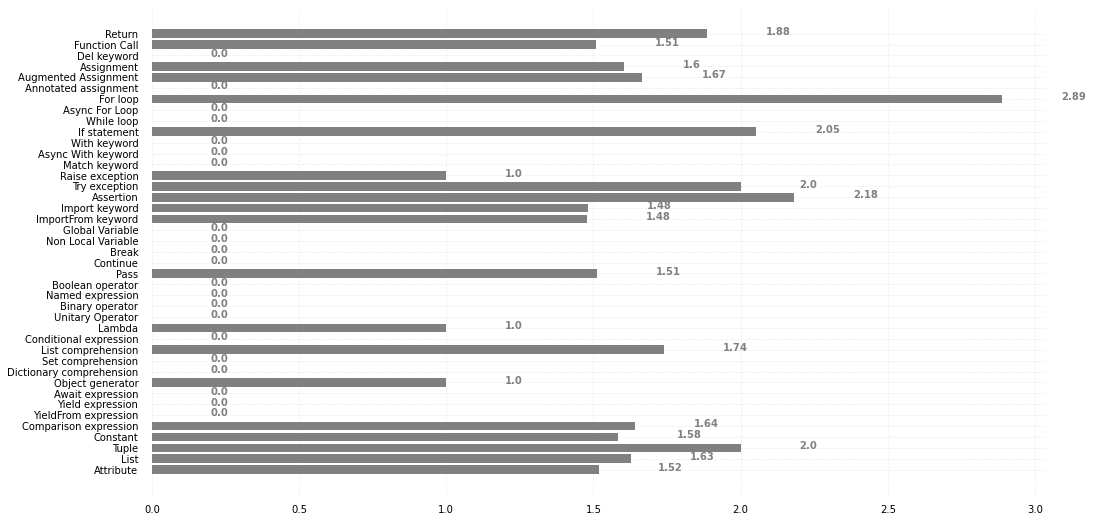

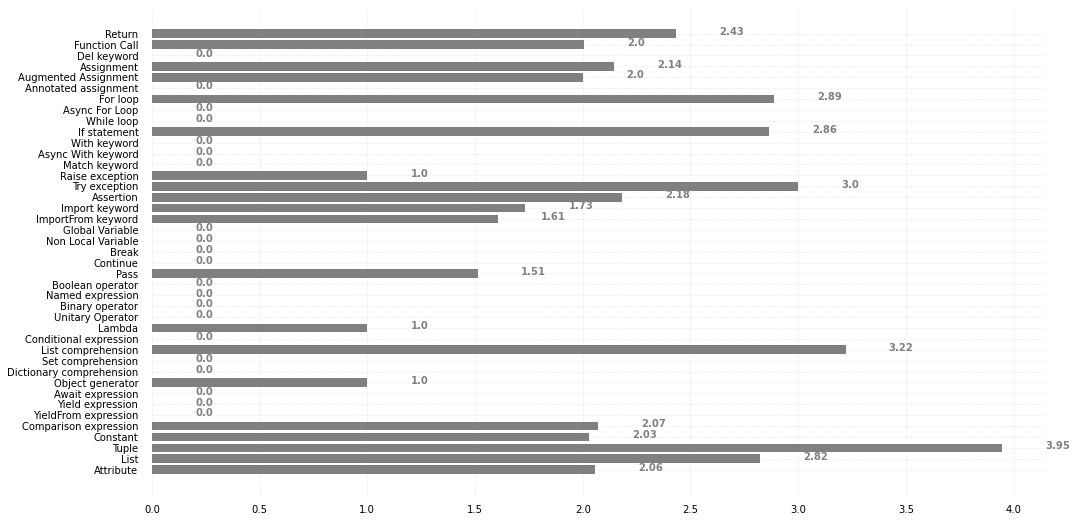

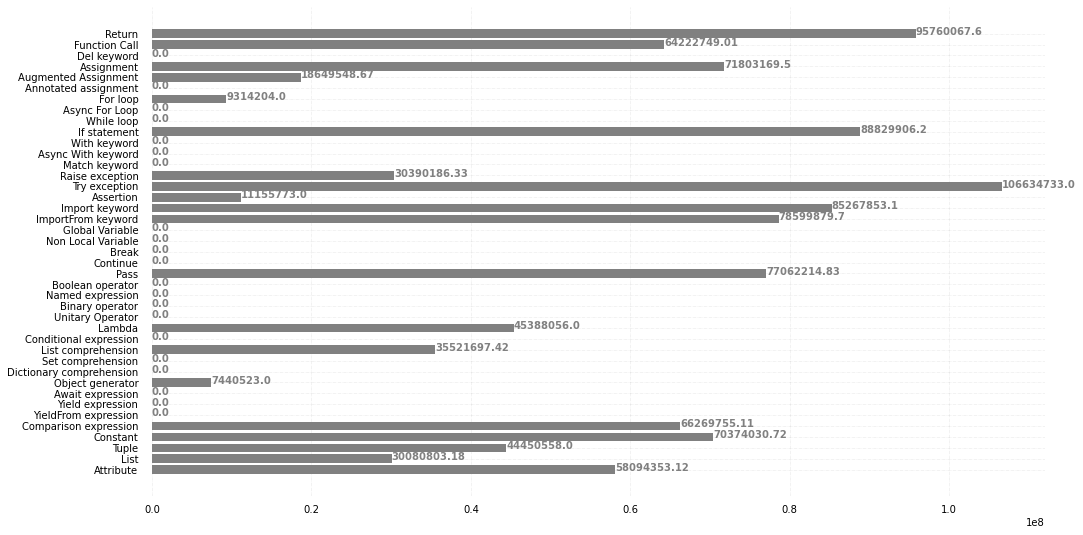

In [63]:
for repo in uniqueRepo:
    
    component_author_average_repo = []
    component_modified_average_repo = []
    component_lifetime_average_repo = []

    for component in code_element_component:
        
        repo_df = buggy_code_element_project(repo)
        
        rslt_df = repo_df[repo_df['Components'].str.contains(component, regex=False)]
    
        component_author_average_repo.append(rslt_df["Number of Authors"].mean())
        component_modified_average_repo.append(rslt_df["Number of times modified"].mean())
        component_lifetime_average_repo.append(rslt_df["Lifetime"].mean())
        
        component_author_average_repo = [0 if math.isnan(x) else x for x in component_author_average_repo]
        component_modified_average_repo = [0 if math.isnan(x) else x for x in component_modified_average_repo]
        component_lifetime_average_repo = [0 if math.isnan(x) else x for x in component_lifetime_average_repo]
        
    BugAuthorDistributionPerRepo(repo,component_author_average_repo)
    BugModifiedDistributionPerRepo(repo,component_modified_average_repo)
    BugLifetimeDistributionPerRepo(repo,component_lifetime_average_repo)

